<a href="https://colab.research.google.com/github/SilahicAmil/Computer-Vision-Pizza-Steak/blob/main/Intro_To_Computer_Vision_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convulution Nueral Networks with TensorFlow

Computer vision is the pracitce of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.


## Get the Data

The images we're working with are from the Food101 dataset: https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use to classes(pizza and steak)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-26 05:42:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.73.240, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   213MB/s    in 0.5s    

2021-06-26 05:42:46 (213 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.

For computer vision, this means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through the pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .'")

There are 2 directories and 1 images in 'pizza_steak' .'
There are 2 directories and 1 images in 'pizza_steak/train' .'
There are 0 directories and 750 images in 'pizza_steak/train/steak' .'
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .'
There are 2 directories and 1 images in 'pizza_steak/test' .'
There are 0 directories and 250 images in 'pizza_steak/test/steak' .'
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .'


In [ ]:
# The extra file in pizza_steak directory is ".DS_STORE"

!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 26 05:42 .
drwxr-xr-x 1 root root 4096 Jun 26 05:42 ..
-rw-r--r-- 1 root root 6148 Jun 26 05:42 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 26 05:42 test
drwxr-xr-x 4 root root 4096 Jun 26 05:42 train


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images_train

750

To visualize our images, first lets get the class names

In [ ]:
# Get the classnames programatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:] # removes .DS_STORE
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot using matplot lib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Shape of img

  return img


Image shape: (512, 512, 3)


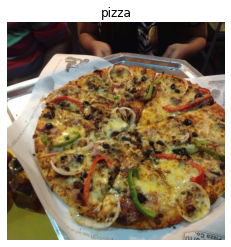

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# View image shape
img.shape # WIDTH, HEIGHT, COLOR

(512, 512, 3)

In [ ]:
# Get all pixel values between 0 & 1
img/255.

array([[[0.37254902, 0.04705882, 0.07843137],
        [0.38431373, 0.05882353, 0.09019608],
        [0.39215686, 0.06666667, 0.09803922],
        ...,
        [0.19215686, 0.14901961, 0.07843137],
        [0.2       , 0.15686275, 0.08627451],
        [0.19215686, 0.14901961, 0.07843137]],

       [[0.40392157, 0.10980392, 0.1372549 ],
        [0.4       , 0.10588235, 0.13333333],
        [0.4       , 0.10588235, 0.13333333],
        ...,
        [0.23529412, 0.18431373, 0.11764706],
        [0.22745098, 0.18431373, 0.11372549],
        [0.22745098, 0.18431373, 0.11372549]],

       [[0.37647059, 0.12941176, 0.16078431],
        [0.36862745, 0.12156863, 0.15294118],
        [0.35686275, 0.11764706, 0.14509804],
        ...,
        [0.2745098 , 0.22352941, 0.14901961],
        [0.24705882, 0.20392157, 0.1254902 ],
        [0.25882353, 0.21568627, 0.1372549 ]],

       ...,

       [[0.47843137, 0.48627451, 0.2       ],
        [0.47058824, 0.47843137, 0.19215686],
        [0.4627451 , 0

## End- To- End Example

Let's build a CNN to find patterns in our images, more specfically we need a way to:

* Load our images
* Preprocess our images
* Build our CNN to find patterns
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Variables

BATCH_SIZE = 32
IMG_SIZE = 224, 224
SEED = 42

# Preprocess data (Get all pixel values between 0-1 Scaling/Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "/content/pizza_steak/train"
test_dir =  "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMG_SIZE,
                                               class_mode="binary",
                                               seed=SEED)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMG_SIZE,
                                               class_mode="binary",
                                               seed=SEED)

# Build a CNN Model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 202ms/step - loss: 0.5803 - accuracy: 0.6980 - val_loss: 0.4159 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4262 - accuracy: 0.8127 - val_loss: 0.3431 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3760 - accuracy: 0.8387 - val_loss: 0.3441 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3612 - accuracy: 0.8440 - val_loss: 0.2938 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3202 - accuracy: 0.8700 - val_loss: 0.3146 - val_accuracy: 0.8640


# We can do all 5 EPOCHs in the time it would take to do one without a GPU enabled

In [ ]:
# Epoch 1/5
# 47/47 [==============================] - 110s 2s/step - loss: 0.5426 - accuracy: 0.7240 - val_loss: 0.3738 - val_accuracy: 0.8260


In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0